In [24]:
import cv2
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

import glob
import os.path as op

In [36]:
def imshow(img, cmap=None):
    plt.imshow(img, cmap)
    plt.show()

In [38]:
def load_data(data_path):
    images = []
    for filename in glob.glob(op.join(data_path, '*')):
        print(filename)
        
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
        
        imshow(img)
    
    return np.array(images)

images/denny/denny08.jpg


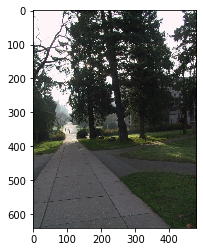

images/denny/denny09.jpg


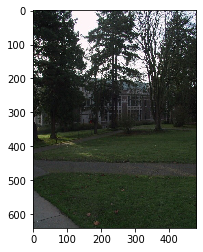

images/denny/denny01.jpg


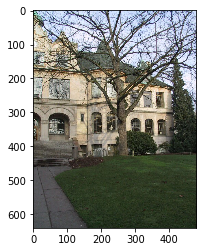

images/denny/denny14.jpg


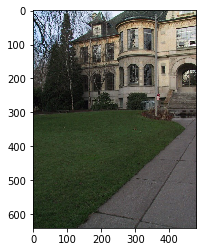

images/denny/denny00.jpg


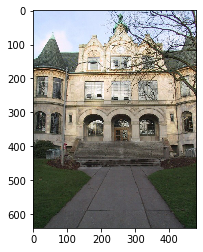

images/denny/denny02.jpg


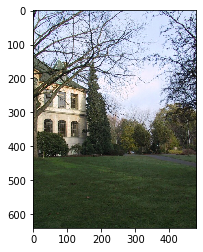

images/denny/denny03.jpg


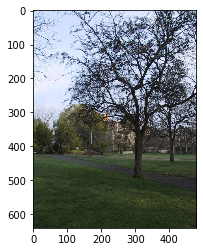

images/denny/denny13.jpg


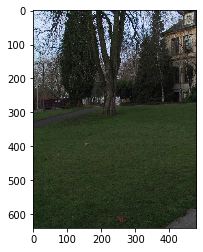

images/denny/denny07.jpg


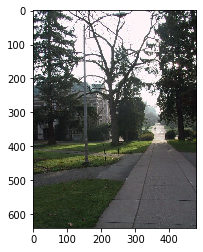

images/denny/denny06.jpg


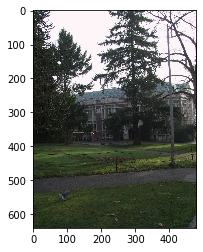

images/denny/denny12.jpg


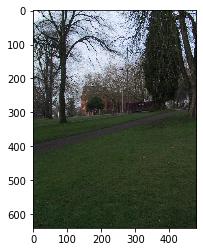

images/denny/denny04.jpg


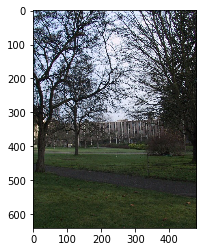

images/denny/denny10.jpg


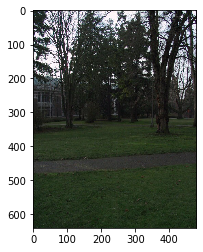

images/denny/denny11.jpg


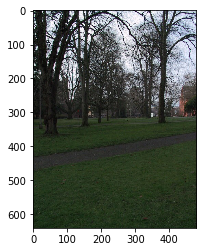

images/denny/denny05.jpg


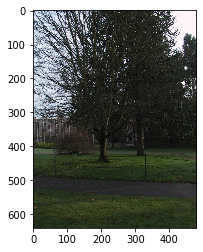

(15, 640, 480, 3)


In [39]:
img_set = load_data('images/denny')
print(img_set.shape)

In [78]:
# Harris Matrix (for MSOP)
def Harris(I, ks=(5, 5), sig_i=1.5, sig_d=1.0):
    # gradient (h-2, w-2, c)
    g_x = I[2:, 1:-1] - I[:-2, 1:-1]
    g_y = I[1:-1, 2:] - I[1:-1, :-2]
    imshow(g_x)
    imshow(g_y)
    print('g', g_x.shape)
    
    # blurred gradient (h-2, w-2, c)
    I_x = cv2.GaussianBlur(g_x, ks, sig_d)
    I_y = cv2.GaussianBlur(g_y, ks, sig_d)
    imshow(I_x)
    imshow(I_y)
    print('I', I_x.shape)
    
    # (h-2, w-2, c)
    S_x2 = cv2.GaussianBlur(I_x * I_x, ks, sig_i)
    S_y2 = cv2.GaussianBlur(I_y * I_y, ks, sig_i)
    S_xy = cv2.GaussianBlur(I_x * I_y, ks, sig_i)
    print('S', S_x2.shape)
    
    # Harris (h-2, w-2, 2, 2, c)
    H_l = np.moveaxis([[S_x2, S_xy], [S_xy, S_y2]], (0, 1), (2, 3))
    print('H', H_l.shape)
    
    # determinant and trace (h-2, w-2, c)
    det_H = H_l[:, :, 0, 0] - H_l[:, :, 1, 0] - H_l[:, :, 0, 1] + H_l[:, :, 1, 1]
    tr_H = np.trace(H_l, axis1=2, axis2=3)
    print('det', det_H.shape)
    print('tr', tr_H.shape)
    
    
    return det_H, tr_H

def HarrisCornerDetector(img, k=0.05, th=1):
    # Harris (h-2, w-2, c)
    det_H, tr_H = Harris(img)
    
    # response (h-2, w-2, c)
    R = det_H - k*np.power(tr_H, 2)
    imshow(R)
    print(R[0, 0])
    
    # thresholding
    imshow(R[:, :] > 0)

# Multi-Scale Oriented Patches
def MSOP(img, ks=(5, 5), sig_p=1.0, sig_i=1.5, sig_d=1.0):
    
    # Multi-Scale Harris Corner Detector
    P = []
    f_HM = []
    
    P.append(img)
    f_HM.append(Harris(P[0]))
    for i in range(1, 4):
        # gaussian blur
        P_l = cv2.GaussianBlur(P[i], ks, sig_p)
        # down sampling
        P_l = P_l[::2]
        
        P.append(P_l)
        f_HM.append(Harris(P_l))
        
        
        
        
        
    

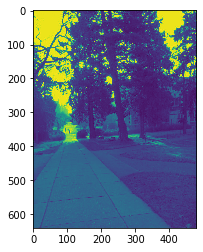

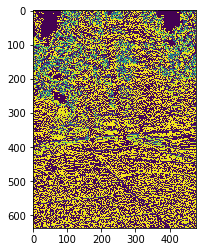

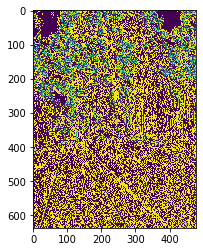

g (638, 478)


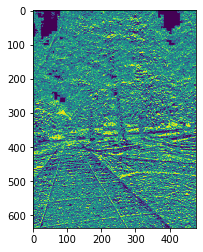

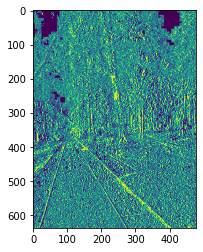

I (638, 478)
S (638, 478)
H (638, 478, 2, 2)
det (638, 478)
tr (638, 478)


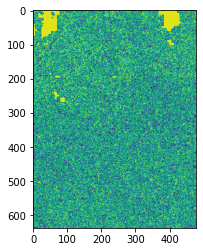

-532.0


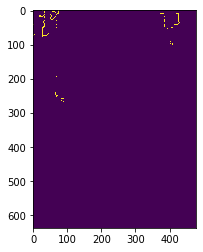

In [79]:
img_gray = cv2.cvtColor(img_set[0], cv2.COLOR_RGB2GRAY)
imshow(img_gray)

HarrisCornerDetector(img_gray)

In [43]:
a = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
b = np.array([[[5, 4, 7], [2, 5, 6]], [[4, 2, 10], [24, 32, 5]]])
c = np.array([[[5, 42, 42], [2, 5, 6]], [[4, 2793, 10], [24, 32, -1289]]])

l_ab = np.array([[a, c], [c, b]])
print(l_ab)
print(l_ab.shape)
print('---')

tmp = l_ab[:, :, 0, 0, :] - l_ab[:, :, 1, 0, :] - l_ab[:, :, 0, 1, :] + l_ab[:, :, 1, 1, :]
print(tmp)

[[[[[    1     2     3]
    [    4     5     6]]

   [[    7     8     9]
    [   10    11    12]]]


  [[[    5    42    42]
    [    2     5     6]]

   [[    4  2793    10]
    [   24    32 -1289]]]]



 [[[[    5    42    42]
    [    2     5     6]]

   [[    4  2793    10]
    [   24    32 -1289]]]


  [[[    5     4     7]
    [    2     5     6]]

   [[    4     2    10]
    [   24    32     5]]]]]
(2, 2, 2, 2, 3)
---
[[[    0     0     0]
  [   23 -2724 -1263]]

 [[   23 -2724 -1263]
  [   23    29    -4]]]
